<p style="text-align:right"><img  src="https://postmba.org/www/wp-content/uploads/2021/10/PostMBA-logo.png" width="150" alt="regression"></p>


<p style="text-align:center"><img  src="https://www.investopedia.com/thmb/EuJkOSwlCbnE0yczJ7TMLn48cxE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/neural-network-4192295-cf532cd009fb40009c0d293f63c497a8.jpg" width="600" alt="regression"></p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;align:left">
<font face="Arial" size=3><b>
Created by :
Hosein Ahmadi</b>
</font>
</p>


In [1]:
import pandas as pd
import time
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [1]:
def neural_network(nernum):
    
    x = np.arange(-4*3.14, 4*3.14, 0.1).reshape((252, 1))
    y = np.sin(x)
    x = MinMaxScaler().fit_transform(x)
    xinsample = x[:230]
    xoutsample = x[230:]
    yinsample = y[:230]
    youtsample = y[230:]
    netnum  = 5
    yhat = np.zeros((len(yinsample), netnum))
    yf = np.zeros((len(youtsample), netnum))
    nn_model = MLPRegressor(hidden_layer_sizes=(nernum, nernum,),
                            solver = 'lbfgs', activation='tanh', max_iter=10000)
    for i in range(netnum):
        fitted_nn_model = nn_model.fit(xinsample, yinsample)
        yhat[:, i] = fitted_nn_model.predict(xinsample)
        yf[:, i] = fitted_nn_model.predict(xoutsample)
    
    yhat = np.mean(yhat, axis=1)
    yf = np.mean(yf, axis=1)
    
    fig, ax = plt.subplots(1, 2, figsize=(13, 6))
    fig.tight_layout()
    ax[0].plot(xinsample, yhat, label = 'd')
    ax[0].plot(xinsample, yinsample)
    ax[1].plot(xoutsample, yf)
    ax[1].plot(xoutsample, youtsample)
    
    ax[0].title.set_text('in sample prediction')
    ax[1].title.set_text('out of sample prediction')
    fig.show()

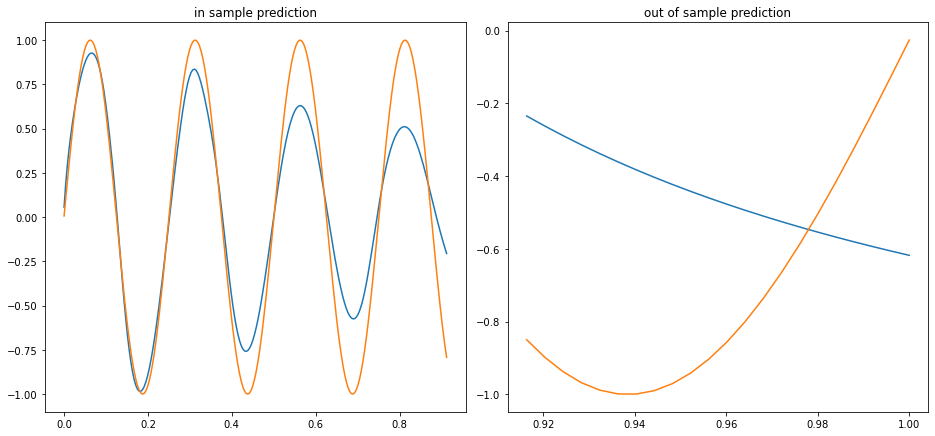

In [14]:
neural_network(5)